In [125]:
from pandas import DataFrame
from pandas import read_excel, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [126]:
# 폰트 설정
#plt.rcParams['font.family'] = "Malgun Gothic" # 윈도우 전용
plt.rcParams['font.family'] = "Malgun Gothic"
#글자 크기
plt.rcParams["font.size"] = 12
# 그래프 크기설정(inch)
plt.rcParams["figure.figsize"] = (15, 7)
# 유티코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

In [127]:
df = read_excel("https://data.hossam.kr/D01/bitcoin.xlsx")
df

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
1,2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2,2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
3,2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
4,2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...,...
755,2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
756,2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
757,2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199
758,2023-06-29,30445.7,30077.3,30823.1,30051.3,49.57K,0.0122


In [128]:
# xticks 함수에서 사용할 x좌표 생성
x = list(range(0, len(df['날짜'])))
xticks = list(range(0, len(df['날짜']), 40)) # 40일간격으로

In [129]:
date = []
for i in xticks:
    date.append(df['날짜'][i].strftime("%y%m%d"))
print(date)    

['210601', '210711', '210820', '210929', '211108', '211218', '220127', '220308', '220417', '220527', '220706', '220815', '220924', '221103', '221213', '230122', '230303', '230412', '230522']


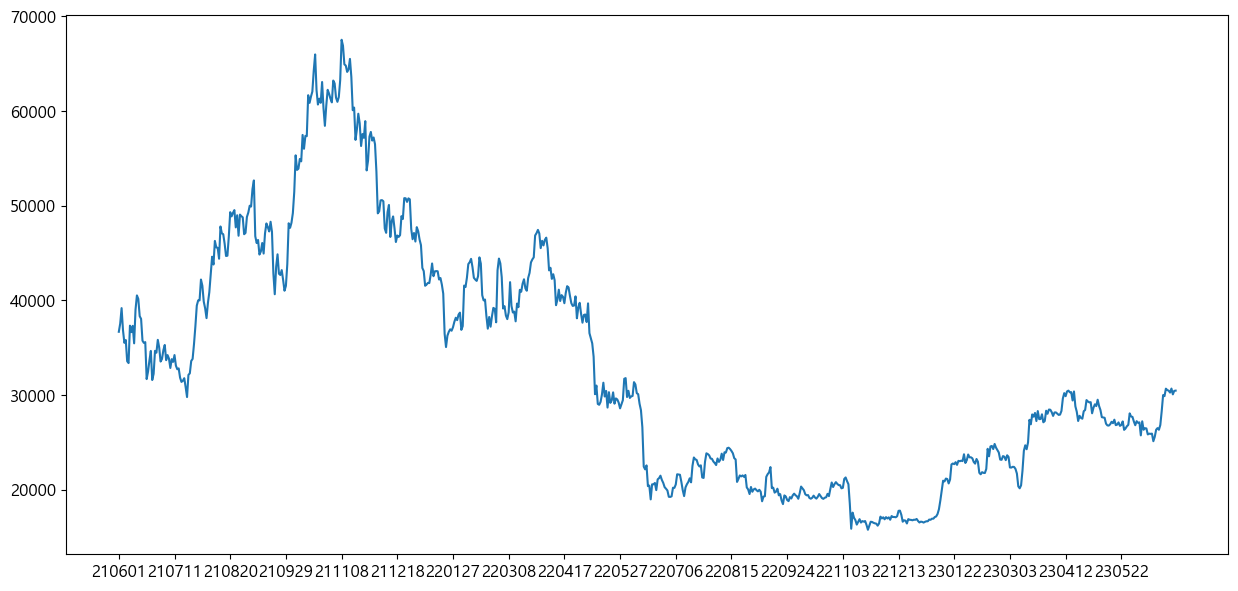

In [130]:
plt.figure()
plt.plot(x, list(df['종가']))
plt.xticks(xticks, date)
plt.show()

In [131]:
df = read_excel("https://data.hossam.kr/D01/senior_lsf.xlsx")
df

,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


In [132]:
df2 = df.sort_values('복지시설', ascending=False)
df2

,지역명,복지시설
10,Nowon-gu,252
15,Gangseo-gu,215
18,Yeongdeungpo-gu,208
16,Guro-gu,192
14,Yangcheon-gu,192
22,Gangnam-gu,184
23,Songpa-gu,173
13,Mapo-gu,160
7,Seongbuk-gu,158
3,Seongdong-gu,155


In [133]:
df3 = df2.head(10)
df3

,지역명,복지시설
10,Nowon-gu,252
15,Gangseo-gu,215
18,Yeongdeungpo-gu,208
16,Guro-gu,192
14,Yangcheon-gu,192
22,Gangnam-gu,184
23,Songpa-gu,173
13,Mapo-gu,160
7,Seongbuk-gu,158
3,Seongdong-gu,155


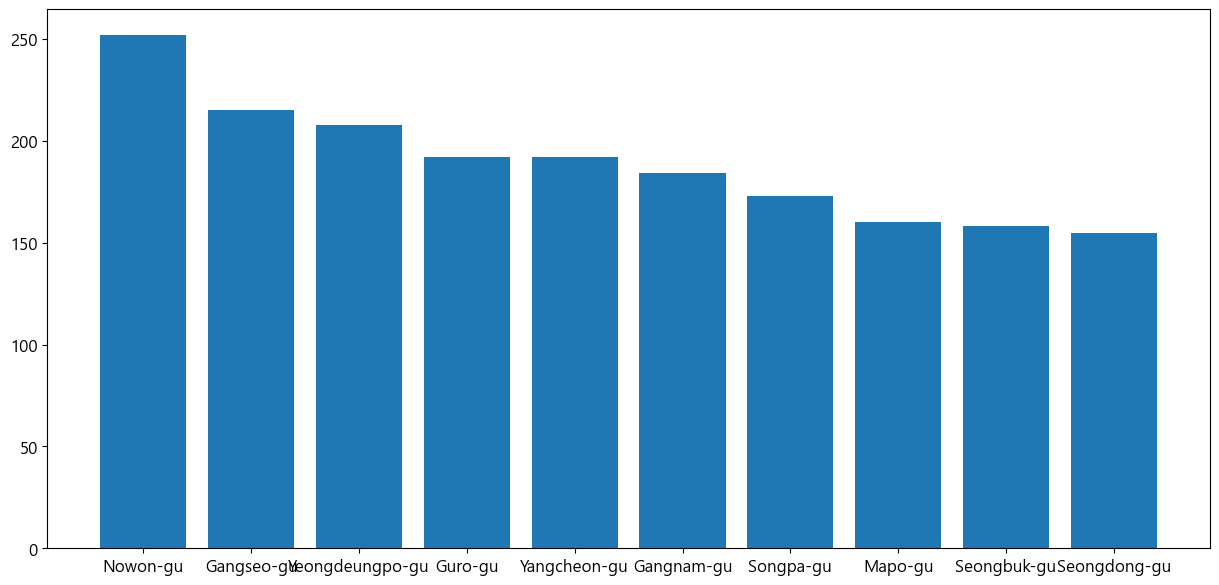

In [134]:
# 시각화
plt.figure()
plt.bar(df3['지역명'], df3['복지시설'])
plt.show()
plt.close()

In [135]:
df = read_excel("https://data.hossam.kr/D01/city_people.xlsx")
df

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [136]:
df2 = df.query("연도 == 2015 or 연도 == 2010")
df2

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


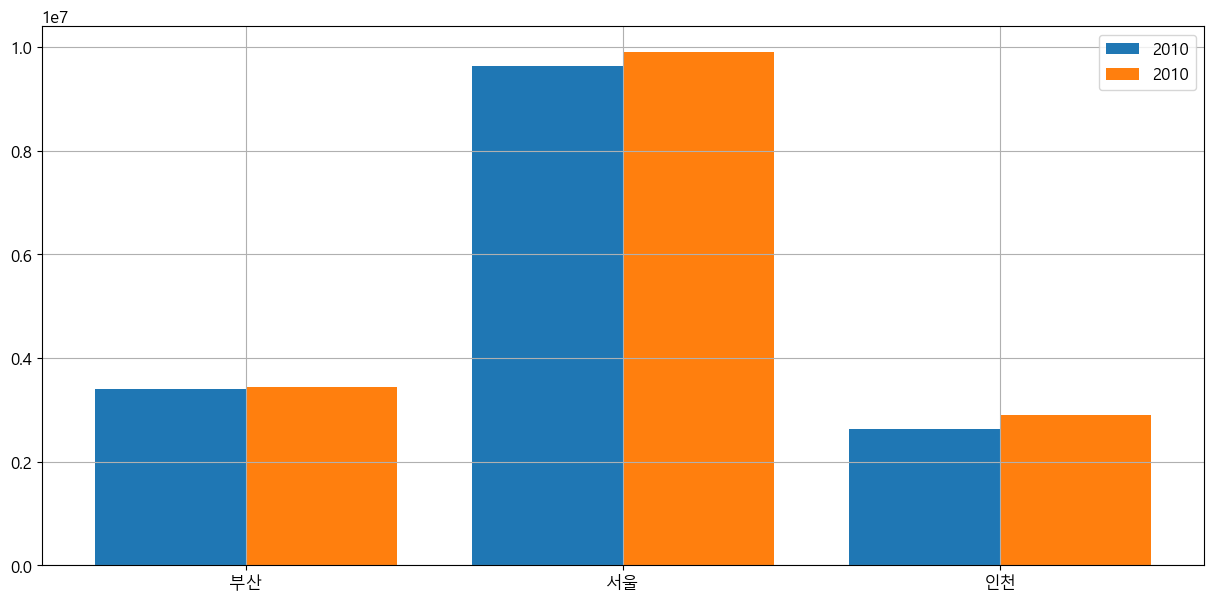

In [137]:
df3 = pivot_table(df2, index='도시', columns='연도', values='인구')
# 연도에서 인구값을 가져와서 새로운 dataframe 형성
# df3
x = np.array(range(0, len(df3.index)))
plt.figure()
plt.bar(x-0.2, df3[2010], label="2010", width=0.4)
plt.bar(x+0.2, df3[2015], label="2010", width=0.4)
plt.grid()
plt.legend()
plt.xticks(x, df3.index)
plt.show()
plt.close()

In [138]:
df = read_excel("https://data.hossam.kr/D01/jobs_by_scale.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종사자규모별  9 non-null      object 
 1   2015    9 non-null      float64
 2   2016    9 non-null      float64
dtypes: float64(2), object(1)
memory usage: 348.0+ bytes


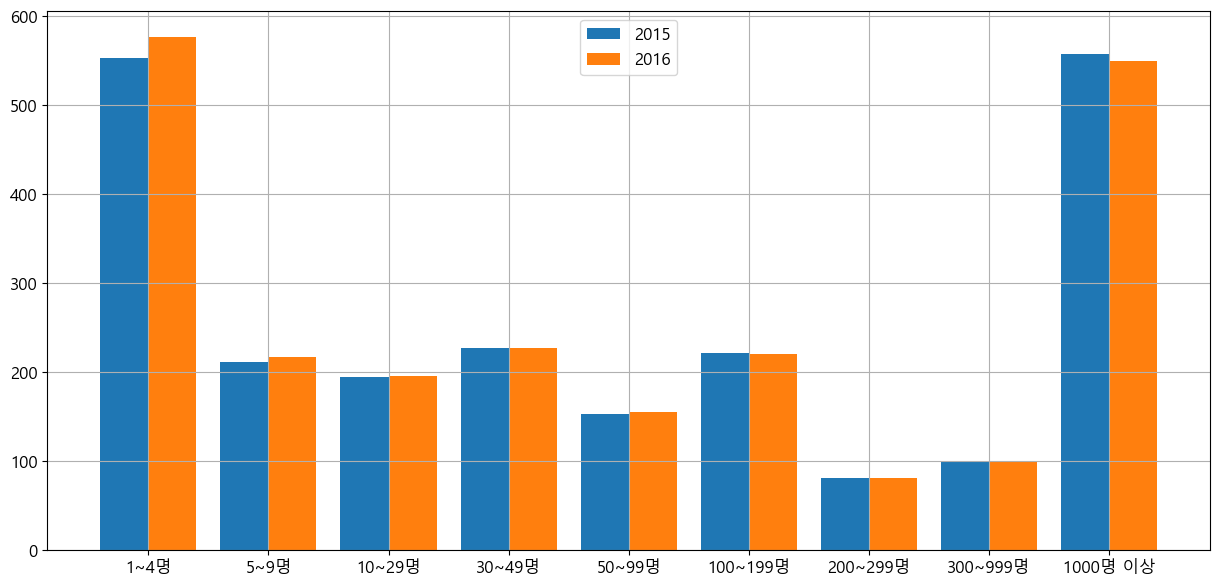

In [139]:
plt.figure()
plt.bar(df.index-0.2, df[2015], label="2015", width=0.4)
plt.bar(df.index+0.2, df[2016], label="2016", width=0.4)
plt.grid()
plt.legend()
plt.xticks(df.index, df['종사자규모별'])
plt.show()
plt.close()

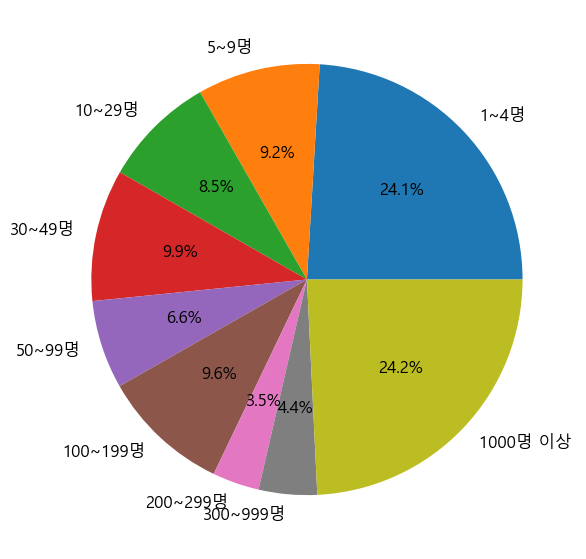

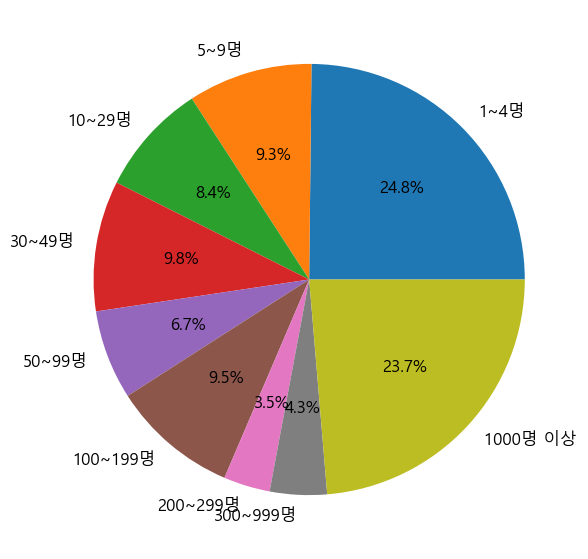

In [140]:
plt.pie(df[2015], labels=df['종사자규모별'], autopct='%0.1f%%')
plt.show()
plt.pie(df[2016], labels=df['종사자규모별'], autopct='%0.1f%%')
plt.show()

In [141]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc.xlsx")
df

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [142]:
기울기, 절편 = np.polyfit(df['발생건수'], df['부상자수'], 1)
z = np.polyfit(df['발생건수'], df['부상자수'], 1) # 1차방정식

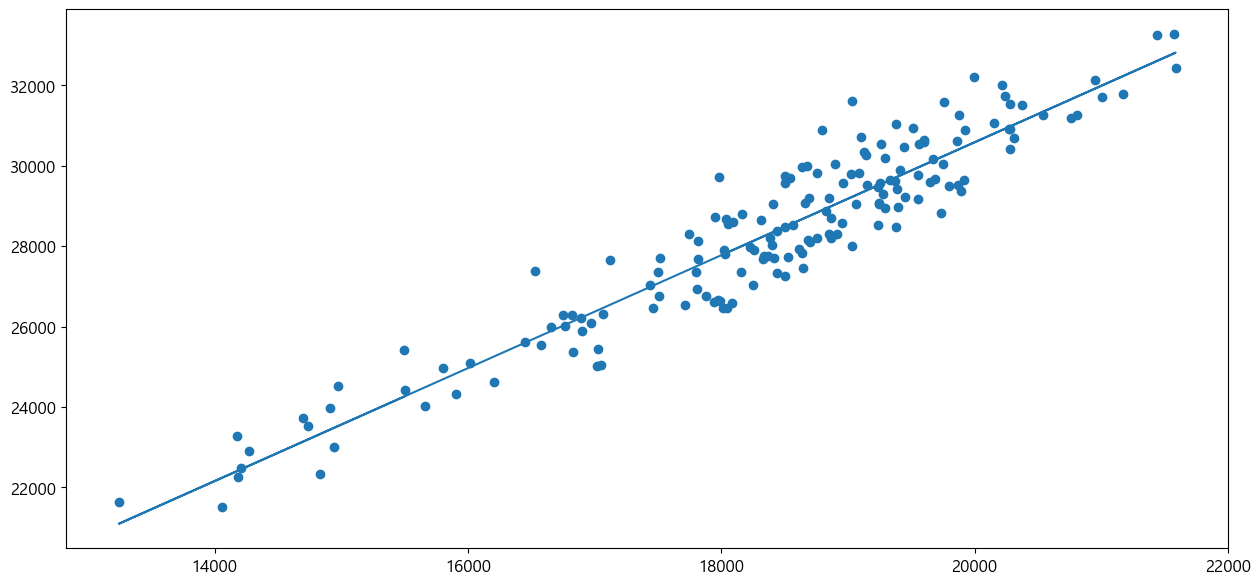

In [143]:
f = np.poly1d(z)
plt.scatter(df['발생건수'], df['부상자수'])
plt.plot(df['발생건수'], f(df['발생건수']))
plt.show()


In [144]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
import datetime as dt
import numpy as np

# 연습문제 2번

In [145]:
df = read_excel('https://data.hossam.kr/D01/covid19.xlsx')
df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
0,2023-05-31,6204277,5987.0,6492,31703511.0,24411.0,34784
1,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767
2,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
3,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
4,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,0,27.0,0.0,0
1208,2020-02-08,10,0.0,0,24.0,0.0,0
1209,2020-02-07,10,0.0,0,24.0,0.0,0
1210,2020-02-06,11,0.0,0,24.0,0.0,0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   서울시 기준일    1212 non-null   datetime64[ns]
 1   서울 확진자     1212 non-null   int64         
 2   서울시 일일 확진  1211 non-null   float64       
 3   서울시 사망     1212 non-null   int64         
 4   전국 확진      1212 non-null   float64       
 5   전국 일일 확진   1211 non-null   float64       
 6   전국 사망      1212 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 66.4 KB


In [147]:
day = input("검색일을 입력하세요(ex20210531)")

In [148]:
start_date = dt.datetime.strptime(day, '%Y%m%d')
print(type(start_date))
start_date

<class 'datetime.datetime'>


datetime.datetime(2023, 4, 16, 0, 0)

In [149]:
delta = dt.timedelta(days=6)
end_date = date + delta

TypeError: can only concatenate list (not "datetime.timedelta") to list

In [ ]:
query_df = df.query('`서울시 기준일` >= @ date and `서울시 기준일` <= @end_date')
print(query_df)
target_df = query_df.sort_values('서울시 기준일')
target_df

ValueError: ('Lengths must match to compare', (1212,), (19,))

In [ ]:
x = list(range(0, len(target_df['서울시 기준일'])))
xticks = []
for i in range(0, len(target_df['서울시 기준일'])):
    xticks.append(target_df['서울시 기준일'].iloc[i].strftime('%m.%d'))
xticks

['02.15', '02.16', '02.17', '02.18', '02.19', '02.20', '02.21']

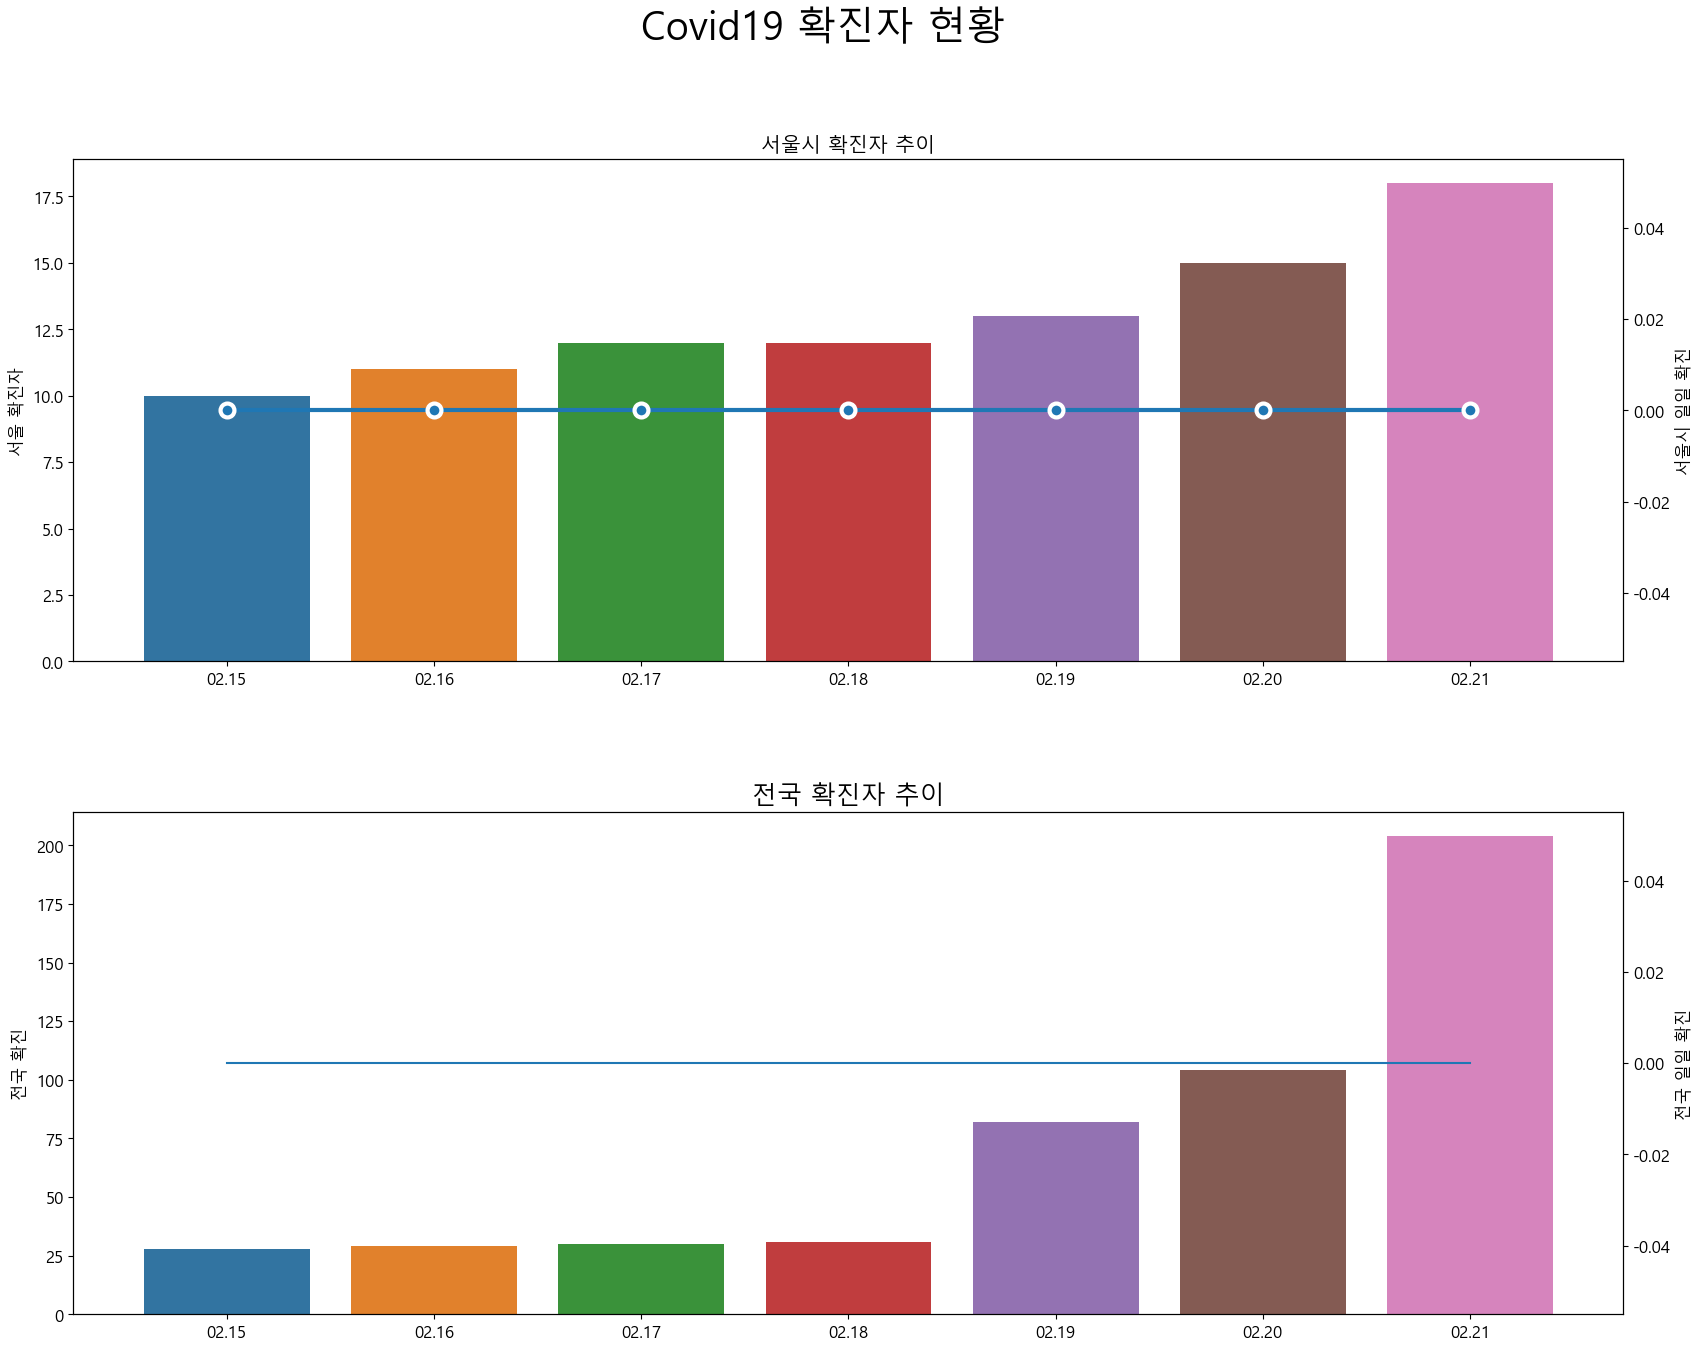

In [ ]:
fig, (ax1_left, ax2_left) = plt.subplots(2,1, figsize=(20, 15))

ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx()

fig.suptitle('Covid19 확진자 현황', fontsize=28)
fig.subplots_adjust(hspace=0.3)

sb.barplot(data=target_df, x=x, y='서울 확진자', ax=ax1_left)
ax1_left.set_title('서울시 확진자 추이')
ax1_left.set_xticks(x)
ax1_left.set_xticklabels(xticks)

sb.lineplot(data=target_df, x=x, y='서울시 일일 확진', ax=ax1_right,
            linewidth=3,marker="o", markersize=10,markeredgewidth=3)

sb.barplot(data=target_df, x=x, y='전국 확진', ax=ax2_left)
ax2_left.set_title('전국 확진자 추이', fontsize=18)
ax2_left.set_xticks(x)
ax2_left.set_xticklabels(xticks)

sb.lineplot(data=target_df, x=x, y='전국 일일 확진', ax=ax2_right)
plt.show()
plt.close()